In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_csv('longley.csv', index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'longley.csv'

In [ ]:
df

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221
1952,98.1,346.999,193.2,359.4,113.270,1952,63.639
1953,99.0,365.385,187.0,354.7,115.094,1953,64.989
1954,100.0,363.112,357.8,335.0,116.219,1954,63.761
1955,101.2,397.469,290.4,304.8,117.388,1955,66.019
1956,104.6,419.180,282.2,285.7,118.734,1956,67.857


In [ ]:
# Consider Gross National Product (GNP) and Employed
# First check their correlation
print("Correlation coefficient = ", np.corrcoef(df.Employed,df.GNP)[0,1])

Correlation coefficient =  0.9835516111796693


In [ ]:
# Since highly correlated, we can conceivably use Employed (Predictor) to predict the GNP. 

X = df.Employed  # predictor (independent variable)
y = df.GNP  # response (dependent variable)
X = sm.add_constant(X)  # Adds a constant term to the predictor (which is a Pandas dataframe)
print(X)

# Now build model using linear regression with Ordinary Least Squares as the fitting approach
lr_model = sm.OLS(y, X).fit()   # We trained the model to learn the const and the slope of the linear model
print(lr_model.summary())

      const  Employed
1947    1.0    60.323
1948    1.0    61.122
1949    1.0    60.171
1950    1.0    61.187
1951    1.0    63.221
1952    1.0    63.639
1953    1.0    64.989
1954    1.0    63.761
1955    1.0    66.019
1956    1.0    67.857
1957    1.0    68.169
1958    1.0    66.513
1959    1.0    68.655
1960    1.0    69.564
1961    1.0    69.331
1962    1.0    70.551
                            OLS Regression Results                            
Dep. Variable:                    GNP   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           8.36e-12
Time:                        22:27:18   Log-Likelihood:                -68.391
No. Observations:                  16   AIC:                             140.8
Df Residuals:                      14   BIC:                             

/Users/georgeatia/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# Let's access the parameters of the linear regression model (const and slope)
coefficients = lr_model.params   # Pandas series
print(coefficients)

const      -1430.482314
Employed      27.836256
dtype: float64


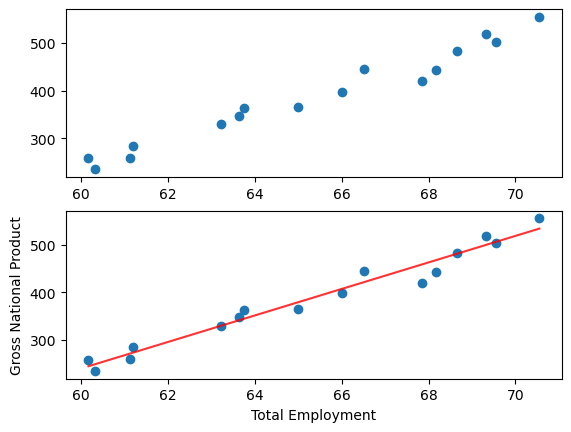

In [ ]:
plt.figure(1)
plt.subplot(211)
plt.scatter(df.Employed, df.GNP)

plt.subplot(212)

# Test data
# We pick 100 points equally spaced from the min to the max
X_prime = np.linspace(X.Employed.min(), X.Employed.max(), 100)
X_prime = sm.add_constant(X_prime)  # Add a constant as we did before

# Now we calculate the predicted values
y_hat = lr_model.predict(X_prime)


plt.scatter(X.Employed, y)  # Plot the raw data
plt.xlabel("Total Employment")
plt.ylabel("Gross National Product")
plt.plot(X_prime[:, 1], y_hat, 'red', alpha=0.8)  # Add the regression line, colored in red